In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
LABEL = pd.read_csv("./DATA/SDG_LABEL.csv").rename(columns={"INDICATOR_ID":"INDICATOR_ID".lower(),"INDICATOR_LABEL_EN":"INDICATOR_LABEL_EN".lower()})
LABEL

,indicator_id,indicator_label_en
0,ADMI.ENDOFLOWERSEC.MAT,Administration of a nationally-representative...
1,ADMI.ENDOFLOWERSEC.READ,Administration of a nationally-representative...
2,ADMI.ENDOFPRIM.MAT,Administration of a nationally-representative...
3,ADMI.ENDOFPRIM.READ,Administration of a nationally-representative...
4,ADMI.GRADE2OR3PRIM.MAT,Administration of a nationally representative...
...,...,...
1657,YADULT.PROFINUMERACY.WPIA,Proportion of population achieving at least a ...
1658,YEARS.FC.COMP.02,Number of years of compulsory pre-primary educ...
1659,YEARS.FC.COMP.1T3,Number of years of compulsory primary and seco...
1660,YEARS.FC.FREE.02,Number of years of free pre-primary education ...


In [3]:
df = pd.read_csv("./DATA/SDG_DATA_NATIONAL.csv")
df.head()

,indicator_id,country_id,year,value,magnitude,qualifier
0,TRTP.1,ABW,2008,99.481873,NaN,NaN
1,AIR.1.GLAST,ABW,2006,93.186119,NaN,NaN
2,GER.0.F,ABW,2005,99.784019,NaN,NaN
3,ROFST.1T2.F.CP,ABW,2001,3.430410,NaN,NaN
4,GER.01.GPIA,ABW,1999,0.000000,NaN,NaN


In [4]:
EGY = df[df["country_id"] == "EGY"]
EGY

,indicator_id,country_id,year,value,magnitude,qualifier
275461,CR.3.M,EGY,2012,76.599998,NaN,NaN
275462,CR.3.M,EGY,2004,69.000000,NaN,NaN
275463,CR.3.M,EGY,2003,67.799995,NaN,NaN
275464,CR.3.M,EGY,1995,58.700001,NaN,NaN
275465,CR.3.M,EGY,1990,54.599998,NaN,NaN
...,...,...,...,...,...,...
281715,CR.3.Q1.F,EGY,2014,27.023479,NaN,NaN
281716,CR.3.Q1.F,EGY,2005,4.526520,NaN,NaN
281717,CR.3.M.WPIA,EGY,2009,0.142310,NaN,NaN
281718,CR.3.M.LPIA,EGY,2005,0.468050,NaN,NaN


In [5]:
EGY = EGY.merge(LABEL,on="indicator_id",how="left")
EGY

,indicator_id,country_id,year,value,magnitude,qualifier,indicator_label_en
0,CR.3.M,EGY,2012,76.599998,NaN,NaN,"Completion rate, upper secondary education, ma..."
1,CR.3.M,EGY,2004,69.000000,NaN,NaN,"Completion rate, upper secondary education, ma..."
2,CR.3.M,EGY,2003,67.799995,NaN,NaN,"Completion rate, upper secondary education, ma..."
3,CR.3.M,EGY,1995,58.700001,NaN,NaN,"Completion rate, upper secondary education, ma..."
4,CR.3.M,EGY,1990,54.599998,NaN,NaN,"Completion rate, upper secondary education, ma..."
...,...,...,...,...,...,...,...
6254,CR.3.Q1.F,EGY,2014,27.023479,NaN,NaN,"Completion rate, upper secondary education, po..."
6255,CR.3.Q1.F,EGY,2005,4.526520,NaN,NaN,"Completion rate, upper secondary education, po..."
6256,CR.3.M.WPIA,EGY,2009,0.142310,NaN,NaN,"Completion rate, upper secondary education, ma..."
6257,CR.3.M.LPIA,EGY,2005,0.468050,NaN,NaN,"Completion rate, upper secondary education, ma..."


In [6]:
indicators = EGY[["indicator_id","indicator_label_en"]].drop_duplicates().sort_values(by="indicator_id")
indicators

,indicator_id,indicator_label_en
634,ADMI.ENDOFLOWERSEC.MAT,Administration of a nationally-representative...
288,ADMI.ENDOFLOWERSEC.READ,Administration of a nationally-representative...
306,ADMI.ENDOFPRIM.MAT,Administration of a nationally-representative...
284,ADMI.ENDOFPRIM.READ,Administration of a nationally-representative...
412,ADMI.GRADE2OR3PRIM.MAT,Administration of a nationally representative...
...,...,...
510,XUNIT.PPPCONST.3.FSGOV.FFNTR,Initial government funding per upper secondary...
364,YEARS.FC.COMP.02,Number of years of compulsory pre-primary educ...
80,YEARS.FC.COMP.1T3,Number of years of compulsory primary and seco...
489,YEARS.FC.FREE.02,Number of years of free pre-primary education ...


In [7]:
map_ = dict(zip(indicators["indicator_id"], indicators["indicator_label_en"]))
map_

{'ADMI.ENDOFLOWERSEC.MAT': ' Administration of a nationally-representative learning assessment at the end of lower secondary education in mathematics (number)',
 'ADMI.ENDOFLOWERSEC.READ': ' Administration of a nationally-representative learning assessment at the end of lower secondary education in reading (number)',
 'ADMI.ENDOFPRIM.MAT': ' Administration of a nationally-representative learning assessment at the end of primary in mathematics (number)',
 'ADMI.ENDOFPRIM.READ': ' Administration of a nationally-representative learning assessment at the end of primary in reading (number)',
 'ADMI.GRADE2OR3PRIM.MAT': ' Administration of a nationally representative learning assessment in Grade 2 or 3 in mathematics (number)',
 'ADMI.GRADE2OR3PRIM.READ': ' Administration of a nationally representative learning assessment in Grade 2 or 3 in reading (number)',
 'AIR.1.GLAST': 'Gross intake ratio to the last grade of primary education, both sexes (%)',
 'AIR.1.GLAST.F': 'Gross intake ratio to t

In [8]:
indicators.to_csv("./Output/indicators.csv",index=False)

In [9]:
data = EGY.groupby(["indicator_id","year"])["value"].mean().unstack().sort_index()
data

year,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
indicator_id,,,,,,,,,,,,,,,,,,,,,
ADMI.ENDOFLOWERSEC.MAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,1.0,1.000000,1.0,1.000000,1.0,1.0,1.0
ADMI.ENDOFLOWERSEC.READ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
ADMI.ENDOFPRIM.MAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
ADMI.ENDOFPRIM.READ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,1.0,1.000000,1.0,1.000000,1.0,1.0,1.0
ADMI.GRADE2OR3PRIM.MAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XUNIT.PPPCONST.3.FSGOV.FFNTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1981.973022,NaN,1738.121948,NaN,NaN,NaN
YEARS.FC.COMP.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
YEARS.FC.COMP.1T3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,9.0,12.0,12.0,12.000000,12.0,12.000000,12.0,12.0,12.0


In [10]:
data.to_csv("./Output/data.csv")

In [11]:
data.columns.values

array([1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

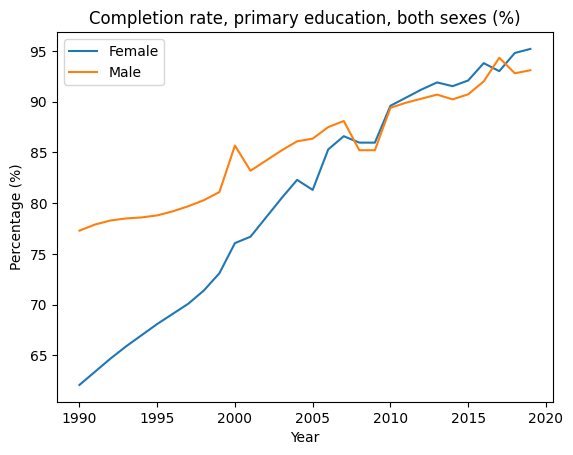

In [12]:
plt.plot(data.columns.values,data.loc["CR.1.F"],label="Female")
plt.plot(data.columns.values,data.loc["CR.1.M"],label="Male")

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.title(map_["CR.1"])

plt.legend()
# Display the plot
plt.show()

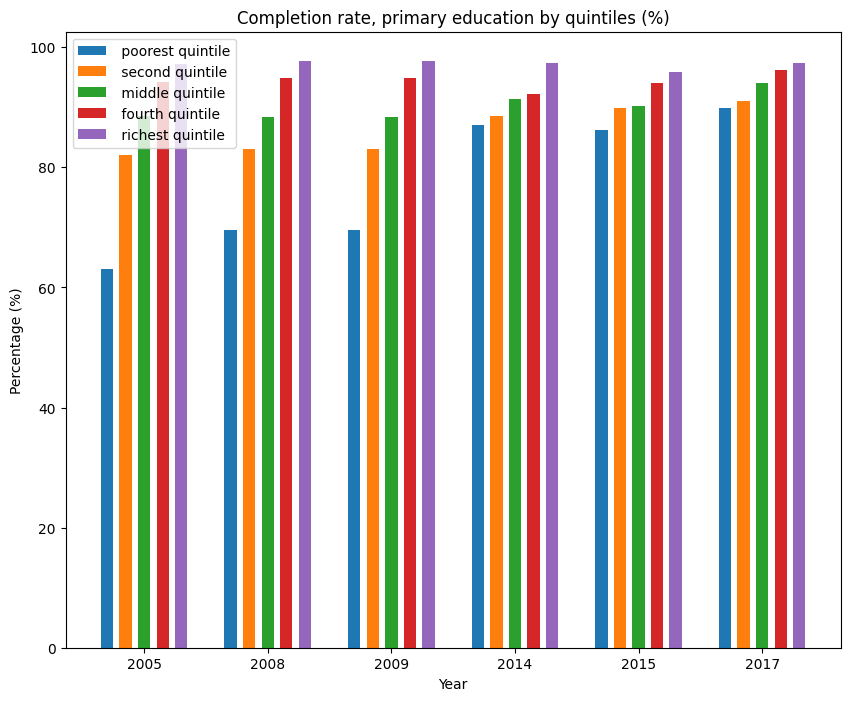

In [23]:
plt.figure(figsize=(10,8))


bar_width = 0.10

for i,x in enumerate(["CR.1.Q1","CR.1.Q2","CR.1.Q3","CR.1.Q4","CR.1.Q5"]):
    xy = data.loc[x].dropna()
    plt.bar(np.array(range(len(xy.index.values)))- 0.3 + i*bar_width + i*0.05, xy.values, width=bar_width, label=map_[x].split(",")[2])

plt.xticks(ticks=range(len(xy.index.values)),labels=xy.index.values)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.title("Completion rate, primary education by quintiles (%)")

plt.legend()
# Display the plot
plt.show()

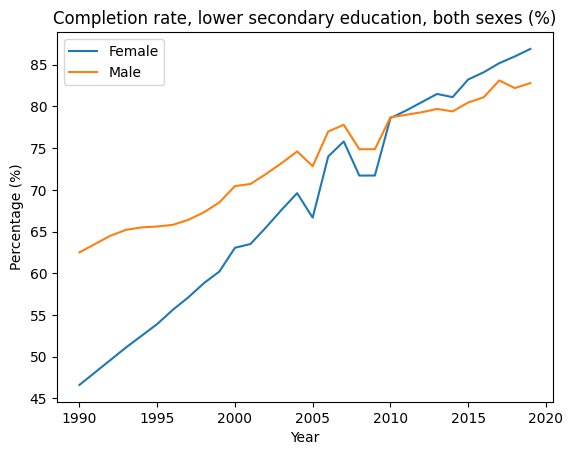

In [14]:
plt.plot(data.columns.values,data.loc["CR.2.F"],label="Female")
plt.plot(data.columns.values,data.loc["CR.2.M"],label="Male")

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.title(map_["CR.2"])

plt.legend()
# Display the plot
plt.show()

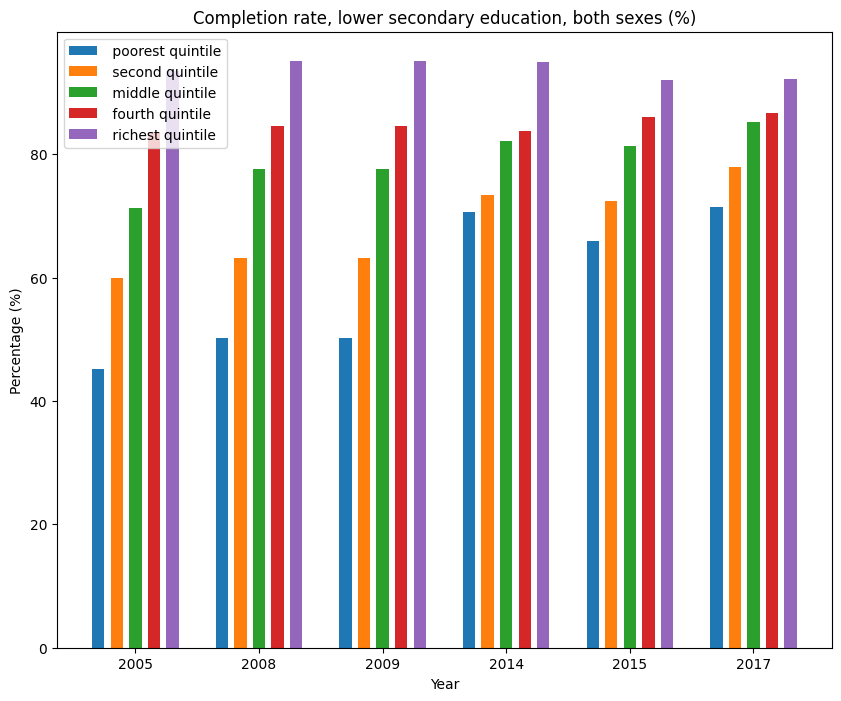

In [15]:
plt.figure(figsize=(10,8))


bar_width = 0.10

for i,x in enumerate(["CR.2.Q1","CR.2.Q2","CR.2.Q3","CR.2.Q4","CR.2.Q5"]):
    xy = data.loc[x].dropna()
    plt.bar(np.array(range(len(xy.index.values)))- 0.3 + i*bar_width + i*0.05, xy.values, width=bar_width, label=map_[x].split(",")[2])

plt.xticks(ticks=range(len(xy.index.values)),labels=xy.index.values)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.title(map_["CR.2"])

plt.legend()
# Display the plot
plt.show()

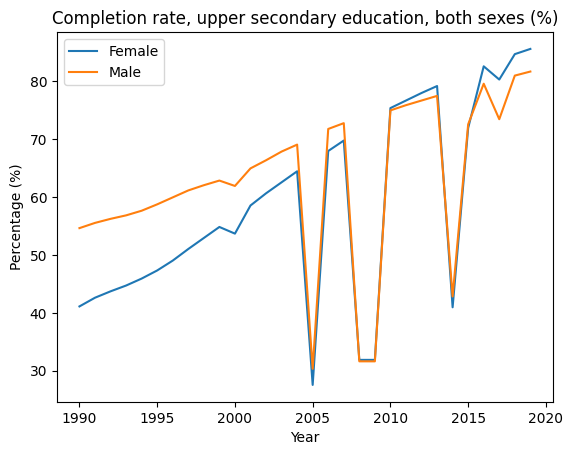

In [16]:
plt.plot(data.columns.values,data.loc["CR.3.F"],label="Female")
plt.plot(data.columns.values,data.loc["CR.3.M"],label="Male")

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.title(map_["CR.3"])

plt.legend()
# Display the plot
plt.show()

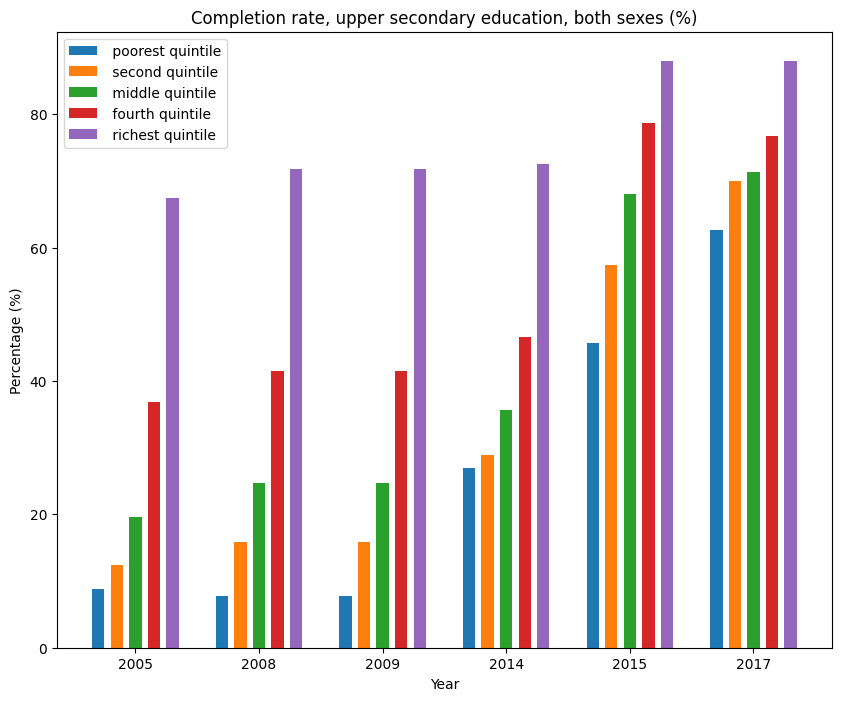

In [17]:
plt.figure(figsize=(10,8))


bar_width = 0.10

for i,x in enumerate(["CR.3.Q1","CR.3.Q2","CR.3.Q3","CR.3.Q4","CR.3.Q5"]):
    xy = data.loc[x].dropna()
    plt.bar(np.array(range(len(xy.index.values)))- 0.3 + i*bar_width + i*0.05, xy.values, width=bar_width, label=map_[x].split(",")[2])

plt.xticks(ticks=range(len(xy.index.values)),labels=xy.index.values)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.title(map_["CR.3"])

plt.legend()
# Display the plot
plt.show()

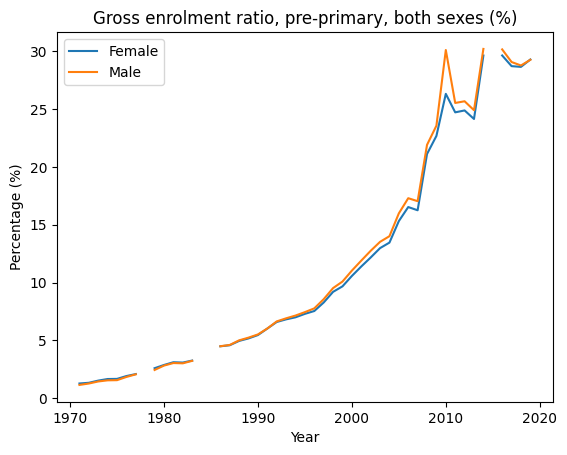

In [18]:
plt.plot(data.columns.values,data.loc["GER.02.F"],label="Female")
plt.plot(data.columns.values,data.loc["GER.02.M"],label="Male")

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.title(map_["GER.02"])

plt.legend()
# Display the plot
plt.show()

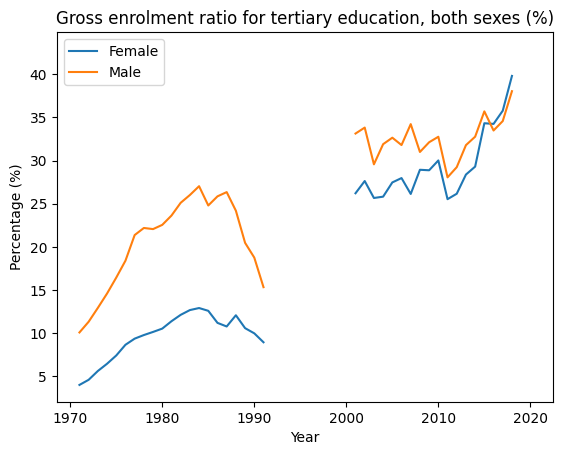

In [19]:
plt.plot(data.columns.values,data.loc["GER.5T8.F"],label="Female")
plt.plot(data.columns.values,data.loc["GER.5T8.M"],label="Male")

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.title(map_["GER.5T8"])

plt.legend()
# Display the plot
plt.show()

In [20]:
# #for x in data.index.values:
# for x in ["CR.1","CR.2","CR.3","ROFST.1.CP"]:
#     plt.plot(data.columns.values,data.loc[x])

#     # Add labels and title
#     plt.xlabel('Year')
#     plt.ylabel('value')
#     plt.title(x)

#     plt.legend()
#     # Display the plot
#     plt.show()